#ML Data Cleaning and feature selection

# About Dataset

This dataset contains about 10 years of daily weather observations from numerous Australian weather stations.

**Taget Variable:**<br>
RainTomorrow - The amount of next day rain in mm. Used to

*   RainTomorrow - The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk"

**Independent Variables:**<br>
* Date - Date of observation<br>
* Location - The common name of the location of the weather station<br>
* MinTemp - The minimum temperature in degrees celsius<br>
* MaxTemp - The maximum temperature in degrees celsius<br>
* Rainfall - The amount of rainfall recorded for the day in mm<br>
* Evaporation - The so-called Class A pan evaporation (mm) in the 24 hours to 9am<br>
* Sunshine - The number of hours of bright sunshine in the day.<br>
* WindGustDir - The direction of the strongest wind gust in the 24 hours to midnight<br>
* WindGustSpeed - The speed (km/h) of the strongest wind gust in the 24 hours to midnight<br>
* WindDir9am - Direction of the wind at 9am<br>
* WindDir3pm - Direction of the wind at 3pm<br>
* WindSpeed9am - Wind speed (km/hr) averaged over 10 minutes prior to 9am<br>
* WindSpeed3pm - Wind speed (km/hr) averaged over 10 minutes prior to 3pm<br>
* Humidity9am - Humidity (percent) at 9am<br>
* Humidity3pm - Humidity (percent) at 3pm<br>
* Pressure9am - Atmospheric pressure (hpa) reduced to mean sea level at 9am<br>
* Pressure3pm - Atmospheric pressure (hpa) reduced to mean sea level at 3pm<br>
* Cloud9am - Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many <br>
* Cloud3pm - Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values<br>
* Temp9am - Temperature (degrees C) at 9am<br>
* Temp3pm - Temperature (degrees C) at 3pm<br>
* RainToday - Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0<br>

[Link to Kaggle Dataset](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/discussion)

# Aim of project

* What are the data types? (Only numeric and categorical)

* Are there missing values?

* What are the likely distributions of the numeric variables?

* Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

* Which independent variables have missing data? How much?

* Do the training and test sets have the same data?

* In the predictor variables independent of all the other predictor variables?

* Which predictor variables are the most important?

* Do the ranges of the predictor variables make sense?

* What are the distributions of the predictor variables?   

* Remove outliers and keep outliers (does if have an effect of the final predictive model)?

* Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE # Recursive Feature Selection
from sklearn.metrics import confusion_matrix
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import random, math
from sklearn.metrics import r2_score, mean_squared_error

from scipy import stats
import statsmodels.api as sm

In [4]:
!pip install kaggle
from google.colab import files

# Upload your Kaggle API credentials JSON file that you downloaded earlier
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"asawarik44","key":"170df5620c071c54d18c713fe57017db"}'}

In [5]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [6]:
!kaggle datasets download -d jsphyg/weather-dataset-rattle-package


100% 3.83M/3.83M [00:00<00:00, 5.87MB/s]
100% 3.83M/3.83M [00:00<00:00, 4.31MB/s]


In [7]:
!unzip -o weather-dataset-rattle-package.zip -d /content

Archive:  weather-dataset-rattle-package.zip
  inflating: /content/weatherAUS.csv  


Load the dataset

In [8]:
df = pd.read_csv('/content/weatherAUS.csv')
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [9]:
#print total number of columns and rows present in the dataset
print('The Dataset has', df.shape[0], 'rows and', df.shape[1],'columns')

The Dataset has 145460 rows and 23 columns


#What are the data types?

In [10]:
#print datatype of each column to find categorical and numerical variable
print('Column Name      Datatype')
print("")
print(df.dtypes)

Column Name      Datatype

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object


This weather dataset comprises 7 categorical columns with data stored as 'Object' datatype and 16 numerical columns represented as 'float64' datatype.

In [11]:
#Look for concise summary of dataset using info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## EDA on categorical variables

In [12]:
# we will look at categorical columns which has datatype as 'Object'
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [13]:
# This will give statistical summary statistics of the categorical columns
df[cat_cols].describe()

Date  Location WindGustDir WindDir9am WindDir3pm RainToday  \
count       145460    145460      135134     134894     141232    142199   
unique        3436        49          16         16         16         2   
top     2013-11-12  Canberra           W          N         SE        No   
freq            49      3436        9915      11758      10838    110319   

       RainTomorrow  
count        142193  
unique            2  
top              No  
freq         110316

In [14]:
#Look for concise summary of dataset using info()
df[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Date          145460 non-null  object
 1   Location      145460 non-null  object
 2   WindGustDir   135134 non-null  object
 3   WindDir9am    134894 non-null  object
 4   WindDir3pm    141232 non-null  object
 5   RainToday     142199 non-null  object
 6   RainTomorrow  142193 non-null  object
dtypes: object(7)
memory usage: 7.8+ MB


Now, we will impute categorical variable with mode

In [15]:
# Impute categorical var with Mode
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])
df['RainToday'] = df['RainToday'].fillna(df['RainToday'].mode()[0])

In [16]:
# Check Categorical columns again for the null values
df[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Date          145460 non-null  object
 1   Location      145460 non-null  object
 2   WindGustDir   145460 non-null  object
 3   WindDir9am    145460 non-null  object
 4   WindDir3pm    145460 non-null  object
 5   RainToday     145460 non-null  object
 6   RainTomorrow  142193 non-null  object
dtypes: object(7)
memory usage: 7.8+ MB


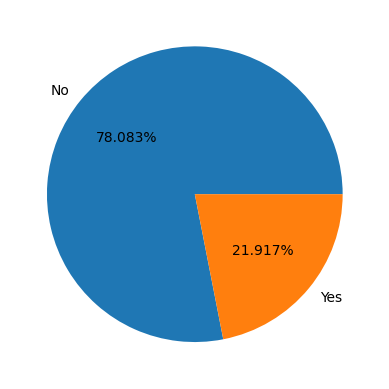

In [17]:
# plot distribution of 'RainToday' variable
d = df['RainToday'].value_counts()
labels = list(d.index)
d
plt.pie(d, labels=labels, autopct='%1.3f%%')
plt.show()

In [18]:
# plot distribution of 'RainTomorrow' target variable
df.dropna(subset=['RainTomorrow'], inplace=True)
d = df['RainTomorrow'].value_counts()
labels = list(d.index)
d
plt.pie(d, labels=labels, autopct='%1.3f%%')
plt.show()

We will convert Date object to year, month and date which then can be converted to categorical columns

In [19]:
# Convert Date object to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [20]:
# Split Date to 'Year', 'Month' & 'Day'
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


In [21]:
# Drop 'Date' from df
data = df.drop('Date', axis=1, inplace=True)

data = df.dropna(axis=0, how='any', subset=["RainTomorrow"])

df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0           44.0          W        WNW  ...       1007.1       8.0       NaN   
1           44.0        NNW        WSW  ...       1007.8       NaN       NaN   
2           46.0          W        WSW  ...       1008.7       NaN       2.0   
3           24.0         SE          E  ...       1012.8       NaN       NaN   
4           41.0        ENE         NW  ...       1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  Year  Month  Day  
0     16.9     21.8         No            No  2008     12    1  
1     17.2     24.3         No            No  2008     12    2  
2     21.0     23.2         No            No  2008     12    3  
3     18.1     26.5         No            No  2008     12    4  
4     17.8     29.7         No            No  2008     12    5  

[5 rows x 25 columns]

In [22]:
# Check unique location
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [23]:
# cat_features is a list of column names representing categorical features in a dataset
cat_features = ['Year', 'Month', 'Day', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday']

print(data.shape)

(142193, 25)


In [24]:
# check top 5
df[cat_features].head()

Year  Month  Day Location WindGustDir WindDir9am WindDir3pm RainToday
0  2008     12    1   Albury           W          W        WNW        No
1  2008     12    2   Albury         WNW        NNW        WSW        No
2  2008     12    3   Albury         WSW          W        WSW        No
3  2008     12    4   Albury          NE         SE          E        No
4  2008     12    5   Albury           W        ENE         NW        No

In [25]:
lencoders = {}
features = ['Year', 'Month', 'Day', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow']
for col in data[features].columns:
    lencoders[col] = LabelEncoder()
    data[col] = lencoders[col].fit_transform(data[col])

In [26]:
encoded_data = data.copy()
encoded_data.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         2     13.4     22.9       0.6          NaN       NaN           13   
1         2      7.4     25.1       0.0          NaN       NaN           14   
2         2     12.9     25.7       0.0          NaN       NaN           15   
3         2      9.2     28.0       0.0          NaN       NaN            4   
4         2     17.5     32.3       1.0          NaN       NaN           13   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  Cloud9am  \
0           44.0          13          14  ...       1007.1       8.0   
1           44.0           6          15  ...       1007.8       NaN   
2           46.0          13          15  ...       1008.7       NaN   
3           24.0           9           0  ...       1012.8       NaN   
4           41.0           1           7  ...       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Year  Month  Day  
0       NaN     16.9     21.8          0             0     1     11    0  
1       NaN     17.2     24.3          0             0     1     11    1  
2       2.0     21.0     23.2          0             0     1     11    2  
3       NaN     18.1     26.5          0             0     1     11    3  
4       8.0     17.8     29.7          0             0     1     11    4  

[5 rows x 25 columns]

## EDA on continuos variables

In [27]:
# we will look at categorical columns which does not have datatype as 'Object'
num_cols = df.select_dtypes(exclude=['object']).columns
df[num_cols].head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6          NaN       NaN           44.0   
1      7.4     25.1       0.0          NaN       NaN           44.0   
2     12.9     25.7       0.0          NaN       NaN           46.0   
3      9.2     28.0       0.0          NaN       NaN           24.0   
4     17.5     32.3       1.0          NaN       NaN           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          20.0          24.0         71.0         22.0       1007.7   
1           4.0          22.0         44.0         25.0       1010.6   
2          19.0          26.0         38.0         30.0       1007.6   
3          11.0           9.0         45.0         16.0       1017.6   
4           7.0          20.0         82.0         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  Year  Month  Day  
0       1007.1       8.0       NaN     16.9     21.8  2008     12    1  
1       1007.8       NaN       NaN     17.2     24.3  2008     12    2  
2       1008.7       NaN       2.0     21.0     23.2  2008     12    3  
3       1012.8       NaN       NaN     18.1     26.5  2008     12    4  
4       1006.0       7.0       8.0     17.8     29.7  2008     12    5

In [28]:
# This will give statistical summary statistics of the numerical columns
df[num_cols].describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  141556.000000  141871.000000  140787.000000  81350.000000   
mean       12.186400      23.226784       2.349974      5.469824   
std         6.403283       7.117618       8.465173      4.188537   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.800000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  74377.000000  132923.000000  140845.000000  139563.000000   
mean       7.624853      39.984292      14.001988      18.637576   
std        3.781525      13.588801       8.893337       8.803345   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.900000      31.000000       7.000000      13.000000   
50%        8.500000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  140419.000000  138583.000000  128179.000000  128212.000000   
mean       68.843810      51.482606    1017.653758    1015.258204   
std        19.051293      20.797772       7.105476       7.036677   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1012.900000    1010.400000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      66.000000    1022.400000    1020.000000   
max       100.000000     100.000000    1041.000000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am        Temp3pm  \
count  88536.000000  85099.000000  141289.000000  139467.000000   
mean       4.437189      4.503167      16.987509      21.687235   
std        2.887016      2.720633       6.492838       6.937594   
min        0.000000      0.000000      -7.200000      -5.400000   
25%        1.000000      2.000000      12.300000      16.600000   
50%        5.000000      5.000000      16.700000      21.100000   
75%        7.000000      7.000000      21.600000      26.400000   
max        9.000000      9.000000      40.200000      46.700000   

                Year          Month            Day  
count  142193.000000  142193.000000  142193.000000  
mean     2012.758926       6.402544      15.715084  
std         2.541256       3.426506       8.798150  
min      2007.000000       1.000000       1.000000  
25%      2011.000000       3.000000       8.000000  
50%      2013.000000       6.000000      16.000000  
75%      2015.000000       9.000000      23.000000  
max      2017.000000      12.000000      31.000000

In [29]:
#Look for concise summary of dataset using info()
df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        141556 non-null  float64
 1   MaxTemp        141871 non-null  float64
 2   Rainfall       140787 non-null  float64
 3   Evaporation    81350 non-null   float64
 4   Sunshine       74377 non-null   float64
 5   WindGustSpeed  132923 non-null  float64
 6   WindSpeed9am   140845 non-null  float64
 7   WindSpeed3pm   139563 non-null  float64
 8   Humidity9am    140419 non-null  float64
 9   Humidity3pm    138583 non-null  float64
 10  Pressure9am    128179 non-null  float64
 11  Pressure3pm    128212 non-null  float64
 12  Cloud9am       88536 non-null   float64
 13  Cloud3pm       85099 non-null   float64
 14  Temp9am        141289 non-null  float64
 15  Temp3pm        139467 non-null  float64
 16  Year           142193 non-null  int64  
 17  Month          142193 non-nul

In [30]:
# Pandas profiling before data preprocessing
!pip install pandas-profiling
from pandas_profiling import ProfileReport

profile = ProfileReport(df[num_cols], title='Pandas profiling before data preprocessing', minimal=True)
profile.to_notebook_iframe()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 84.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=5bd8080d5c4c1631967e940ff559cfad8748b5d6dd261f4067867d485f153512
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


<ipython-input-30-5abad8365e37>:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [31]:
# num_features is a list of column names representing numerical features in a dataset
num_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm']

df[num_features]

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0          13.4     22.9       0.6          NaN       NaN           44.0   
1           7.4     25.1       0.0          NaN       NaN           44.0   
2          12.9     25.7       0.0          NaN       NaN           46.0   
3           9.2     28.0       0.0          NaN       NaN           24.0   
4          17.5     32.3       1.0          NaN       NaN           41.0   
...         ...      ...       ...          ...       ...            ...   
145454      3.5     21.8       0.0          NaN       NaN           31.0   
145455      2.8     23.4       0.0          NaN       NaN           31.0   
145456      3.6     25.3       0.0          NaN       NaN           22.0   
145457      5.4     26.9       0.0          NaN       NaN           37.0   
145458      7.8     27.0       0.0          NaN       NaN           28.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145454          15.0          13.0         59.0         27.0       1024.7   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
0            1007.1       8.0       NaN     16.9     21.8  
1            1007.8       NaN       NaN     17.2     24.3  
2            1008.7       NaN       2.0     21.0     23.2  
3            1012.8       NaN       NaN     18.1     26.5  
4            1006.0       7.0       8.0     17.8     29.7  
...             ...       ...       ...      ...      ...  
145454       1021.2       NaN       NaN      9.4     20.9  
145455       1020.3       NaN       NaN     10.1     22.4  
145456       1019.1       NaN       NaN     10.9     24.5  
145457       1016.8       NaN       NaN     12.5     26.1  
145458       1016.5       3.0       2.0     15.1     26.0  

[142193 rows x 16 columns]

# Are there missing values?

In [32]:
#Lets find missing value columns
missing_values = encoded_data[num_features].isnull().sum()
missing_values

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
dtype: int64

Lets find out missing values in percentage

In [33]:
# Missing values in percent
missing_values_pct = encoded_data[num_features].isnull().sum()/encoded_data.shape[0]*100
missing_values_pct.sort_values(ascending=False)

Sunshine         47.692924
Evaporation      42.789026
Cloud3pm         40.152469
Cloud9am         37.735332
Pressure9am       9.855619
Pressure3pm       9.832411
WindGustSpeed     6.519308
Humidity3pm       2.538803
Temp3pm           1.917113
WindSpeed3pm      1.849599
Humidity9am       1.247600
Rainfall          0.988797
WindSpeed9am      0.948007
Temp9am           0.635756
MinTemp           0.447983
MaxTemp           0.226453
dtype: float64

Now we will impute values to missing data

In [34]:
# Impute data with MICE imputer
imputed_data = encoded_data.copy(deep=True)
mice_imputer = IterativeImputer()
imputed_data.iloc[:, :] = mice_imputer.fit_transform(encoded_data)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
<ipython-input-34-8316e7a42461>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  imputed_data.iloc[:, :] = mice_imputer.fit_transform(encoded_data)


In [35]:
# Check for missing values
imputed_data.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

# Which independent variables have missing data? How much?

In [36]:
#!pip install pandas-profiling
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title='Pandas profiling before data preprocessing', minimal=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#What are the likely distributions of the numeric variables?

In [37]:
# Plot Histogram
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
imputed_data.hist(ax=ax)
plt.show()

<ipython-input-37-55153330f082>:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  imputed_data.hist(ax=ax)


## Likely distribution of numerical variables

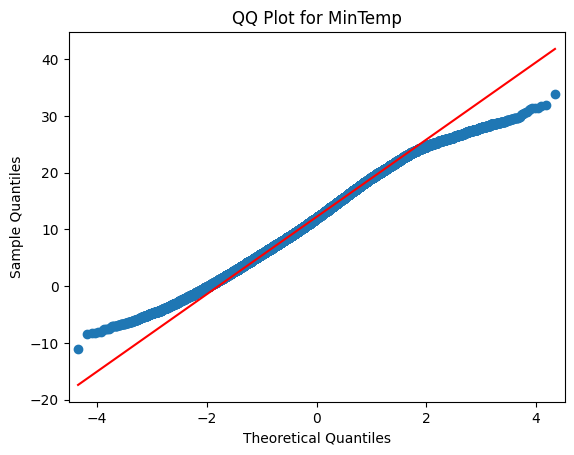

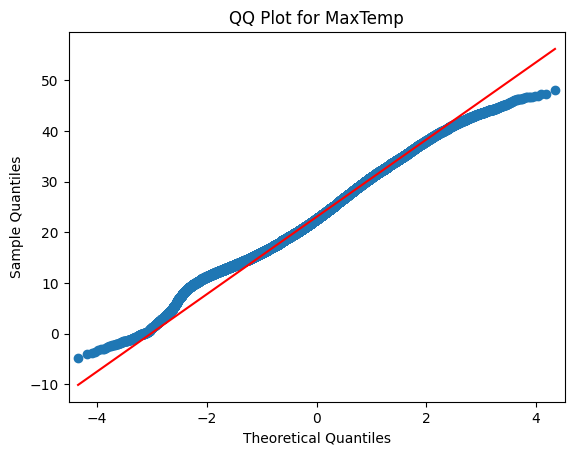

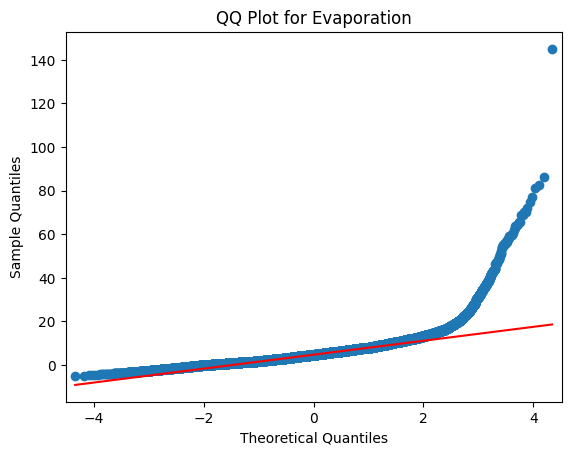

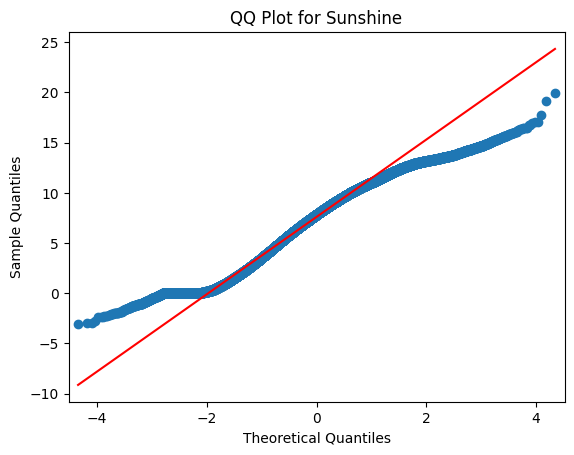

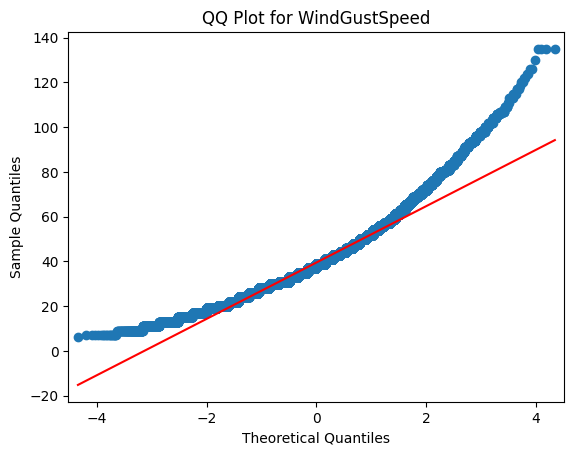

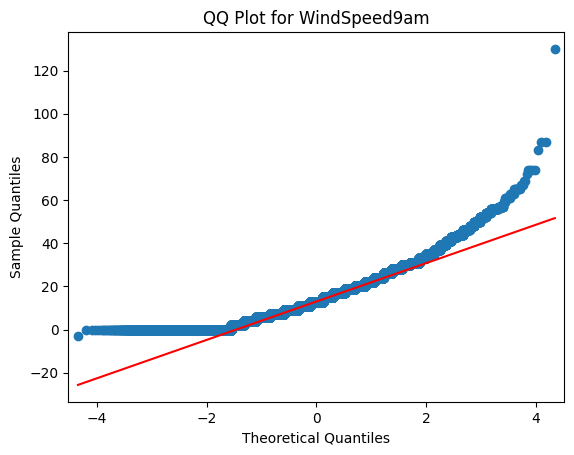

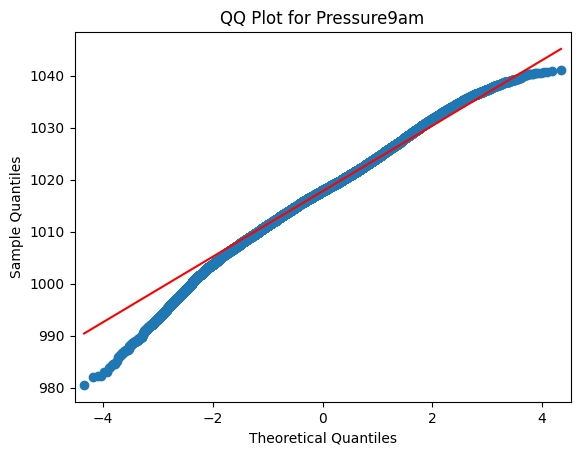

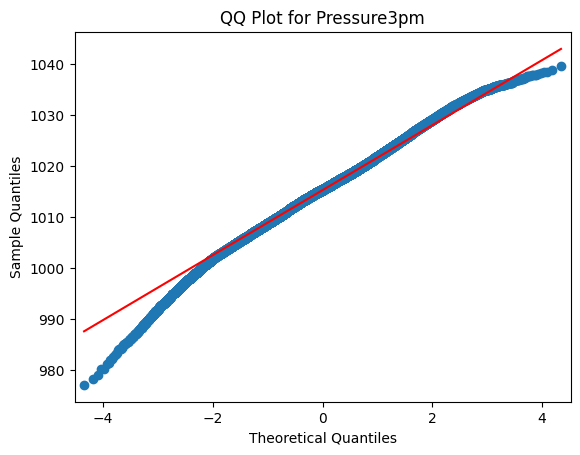

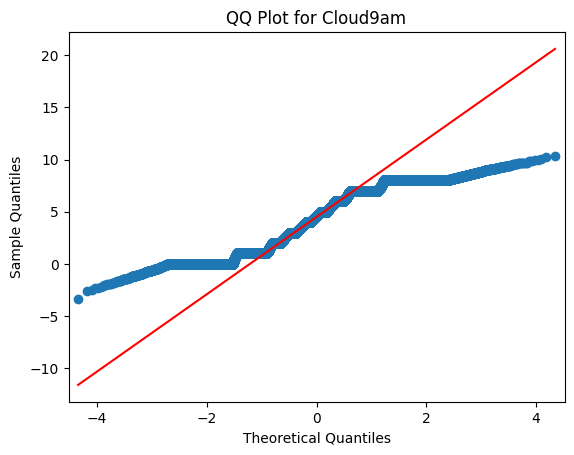

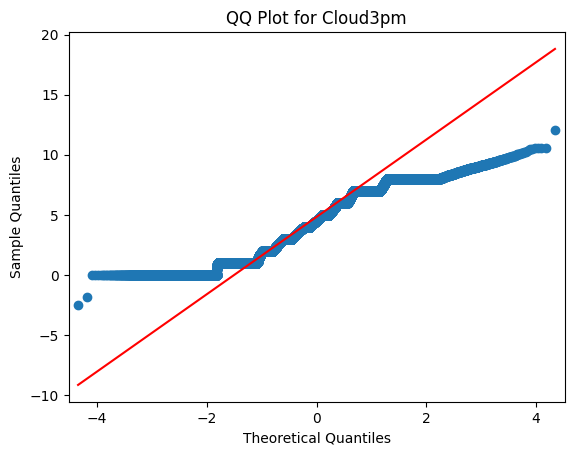

In [38]:
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

# Loop through each numeric column in the DataFrame
for column in df.select_dtypes(include=['float64']):
#    data = df[column].dropna()  # Remove missing values if any
    sm.qqplot(imputed_data[column], line='q')
    plt.title(f'QQ Plot for {column}')
    plt.show()



*   **Bimodal Distributions:** Sunshine, Cloud9am, Cloud3pm
*   **Skewed Normal Distributions:** MinTemp, MaxTemp, WindGustSpeed, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm
*   **Exponential Distributions:** Rainfall, Evaporation, WindSpeed9am, WindSpeed3pm


# What are the distributions of the predictor variables?   

## Likely frequency distribution of categorical variables

In [39]:
for column in imputed_data[cat_features]:
  # Calculate the frequency of each category
  freq = imputed_data[column].value_counts()
  print(column)
  # Print the frequency of each category
  print(freq)
  print("")

Year
9.0     17508
7.0     17400
8.0     17231
2.0     16595
3.0     16419
6.0     16097
4.0     15126
5.0     15044
10.0     8466
1.0      2246
0.0        61
Name: Year, dtype: int64

Month
4.0     13055
2.0     13036
0.0     12921
5.0     12389
9.0     11804
6.0     11779
7.0     11762
10.0    11461
8.0     11345
3.0     11306
11.0    10810
1.0     10525
Name: Month, dtype: int64

Day
0.0     4688
14.0    4688
15.0    4687
12.0    4686
1.0     4686
5.0     4684
21.0    4684
2.0     4683
11.0    4682
6.0     4680
20.0    4677
13.0    4677
18.0    4676
19.0    4675
3.0     4674
22.0    4672
8.0     4672
16.0    4671
7.0     4671
10.0    4668
4.0     4667
23.0    4666
24.0    4665
17.0    4665
9.0     4664
25.0    4637
27.0    4630
26.0    4627
28.0    4374
29.0    4280
30.0    2737
Name: Day, dtype: int64

Location
9.0     3418
37.0    3337
31.0    3193
13.0    3192
15.0    3188
7.0     3161
0.0     3090
6.0     3034
39.0    3033
3.0     3031
22.0    3030
17.0    3028
5.0     3028
1.0 

In [40]:
normalized_data = imputed_data.copy()
for column in normalized_data[cat_features]:
    freq = normalized_data[column].value_counts(normalize=True)
    print(f"{column}\n{freq}\n")

Year
9.0     0.123128
7.0     0.122369
8.0     0.121180
2.0     0.116708
3.0     0.115470
6.0     0.113205
4.0     0.106377
5.0     0.105800
10.0    0.059539
1.0     0.015795
0.0     0.000429
Name: Year, dtype: float64

Month
4.0     0.091812
2.0     0.091678
0.0     0.090869
5.0     0.087128
9.0     0.083014
6.0     0.082838
7.0     0.082719
10.0    0.080602
8.0     0.079786
3.0     0.079512
11.0    0.076023
1.0     0.074019
Name: Month, dtype: float64

Day
0.0     0.032969
14.0    0.032969
15.0    0.032962
12.0    0.032955
1.0     0.032955
5.0     0.032941
21.0    0.032941
2.0     0.032934
11.0    0.032927
6.0     0.032913
20.0    0.032892
13.0    0.032892
18.0    0.032885
19.0    0.032878
3.0     0.032871
22.0    0.032857
8.0     0.032857
16.0    0.032850
7.0     0.032850
10.0    0.032829
4.0     0.032822
23.0    0.032815
24.0    0.032808
17.0    0.032808
9.0     0.032800
25.0    0.032611
27.0    0.032561
26.0    0.032540
28.0    0.030761
29.0    0.030100
30.0    0.019248
Name: Day,

In [41]:
normalized_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142193 entries, 0 to 145458
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  float64
 1   MinTemp        142193 non-null  float64
 2   MaxTemp        142193 non-null  float64
 3   Rainfall       142193 non-null  float64
 4   Evaporation    142193 non-null  float64
 5   Sunshine       142193 non-null  float64
 6   WindGustDir    142193 non-null  float64
 7   WindGustSpeed  142193 non-null  float64
 8   WindDir9am     142193 non-null  float64
 9   WindDir3pm     142193 non-null  float64
 10  WindSpeed9am   142193 non-null  float64
 11  WindSpeed3pm   142193 non-null  float64
 12  Humidity9am    142193 non-null  float64
 13  Humidity3pm    142193 non-null  float64
 14  Pressure9am    142193 non-null  float64
 15  Pressure3pm    142193 non-null  float64
 16  Cloud9am       142193 non-null  float64
 17  Cloud3pm       142193 non-nul

Year


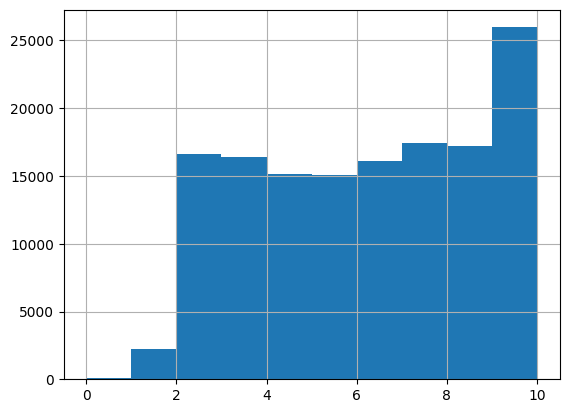

Month


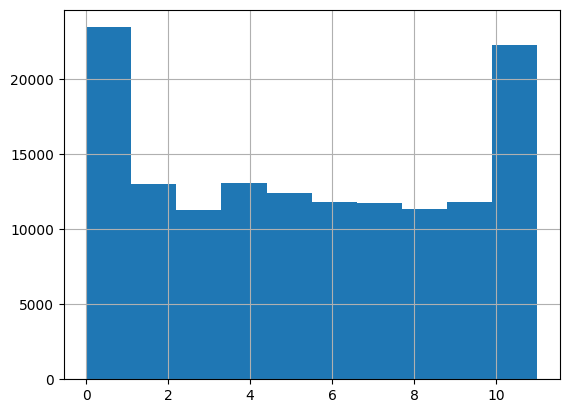

Day


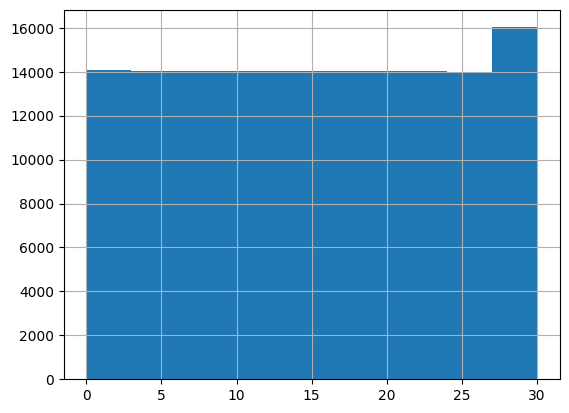

Location


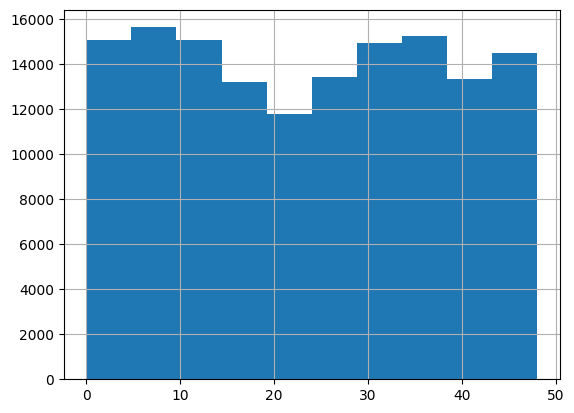

WindGustDir


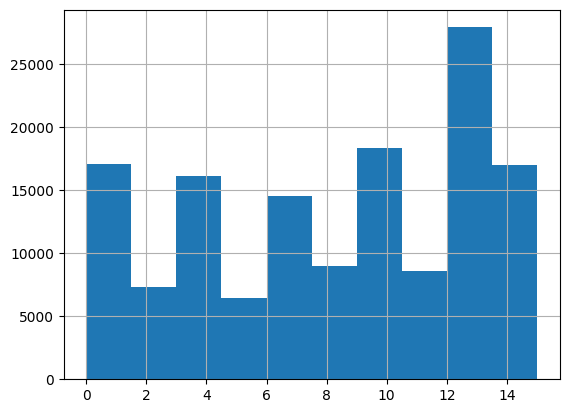

WindDir9am


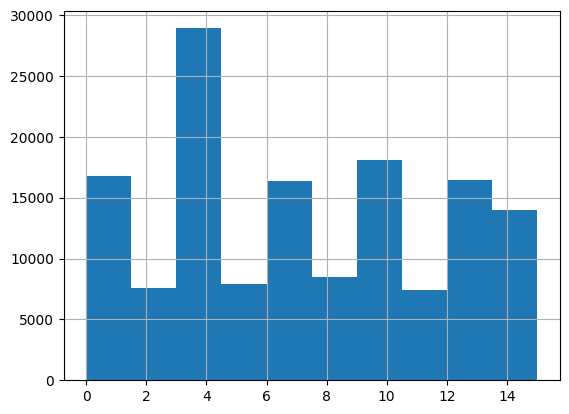

WindDir3pm


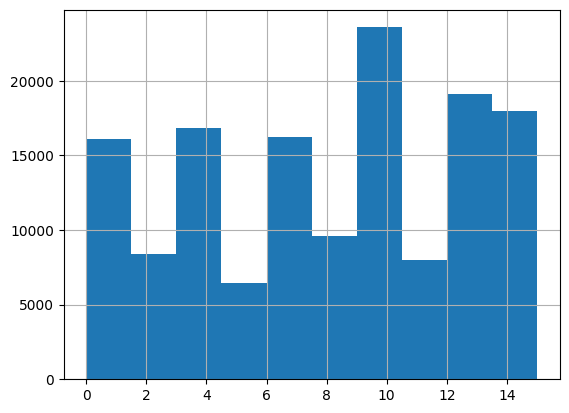

RainToday


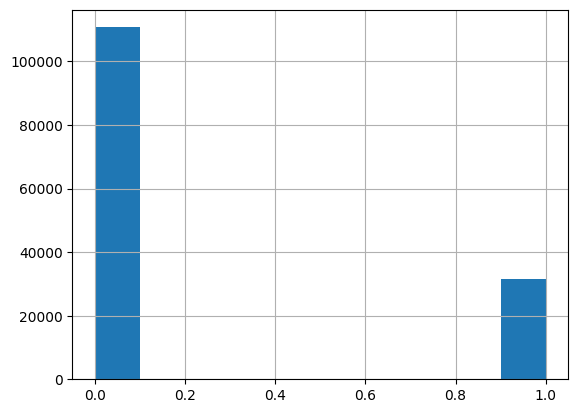

In [42]:
for i, column in enumerate(normalized_data[cat_features]):
    print(column)
    plt.figure(i)
    normalized_data[column].hist()
    plt.show()

<Axes: xlabel='RainTomorrow', ylabel='count'>

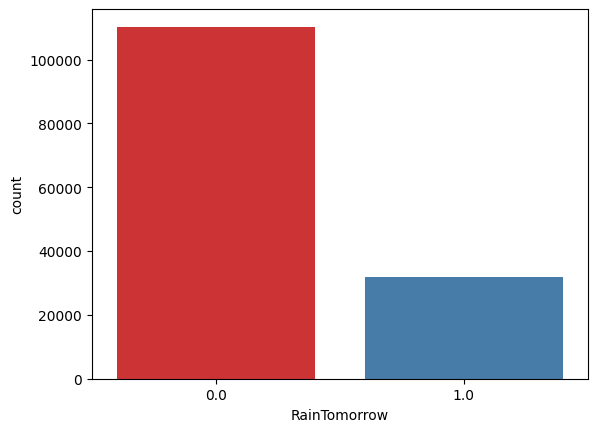

In [43]:
# check Countplot for "RainTomorrow" target variable
sns.countplot(x='RainTomorrow', data = normalized_data, palette = "Set1")

<Axes: xlabel='RainTomorrow', ylabel='count'>

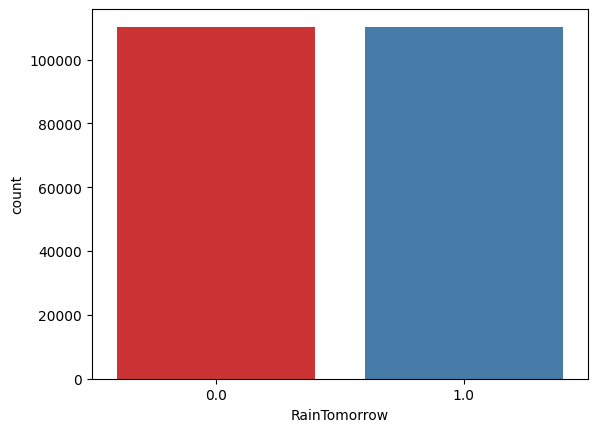

In [44]:
from sklearn.utils import resample

# Separate the majority and minority classes
majority_class = normalized_data[normalized_data.RainTomorrow == 0]
minority_class = normalized_data[normalized_data.RainTomorrow == 1]

# Upsample the minority class to match the majority class
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combine the majority class and upsampled minority class
balanced_df = pd.concat([majority_class, minority_upsampled])

# Now, balanced_df contains a balanced dataset
sns.countplot(x='RainTomorrow', data = balanced_df, palette = "Set1")

# Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

In [59]:
# Standardize our Data - Feature Scaling 0-1 scale

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

#assign scaler to column:
df_scaled = pd.DataFrame(scaler.fit_transform(normalized_data), columns=normalized_data.columns)

df_scaled.head()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0  0.041667  0.543546  0.523629  0.016377     0.074789  0.460249     0.866667   
1  0.041667  0.409950  0.565217  0.014783     0.074041  0.624385     0.933333   
2  0.041667  0.532413  0.576560  0.014783     0.089515  0.663052     1.000000   
3  0.041667  0.450029  0.620038  0.014783     0.076876  0.652139     0.266667   
4  0.041667  0.634837  0.701323  0.017439     0.082383  0.410531     0.866667   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  Cloud9am  \
0       0.294574    0.866667    0.933333  ...       0.4800  0.828973   
1       0.294574    0.400000    1.000000  ...       0.4912  0.386882   
2       0.310078    0.866667    1.000000  ...       0.5056  0.393625   
3       0.139535    0.600000    0.000000  ...       0.5712  0.326243   
4       0.271318    0.066667    0.466667  ...       0.4624  0.755829   

   Cloud3pm   Temp9am   Temp3pm  RainToday  RainTomorrow  Year  Month  \
0  0.516839  0.508439  0.522073        0.0           0.0   0.1    1.0   
1  0.350588  0.514768  0.570058        0.0           0.0   0.1    1.0   
2  0.308159  0.594937  0.548944        0.0           0.0   0.1    1.0   
3  0.297931  0.533755  0.612284        0.0           0.0   0.1    1.0   
4  0.721418  0.527426  0.673704        0.0           0.0   0.1    1.0   

        Day  
0  0.000000  
1  0.033333  
2  0.066667  
3  0.100000  
4  0.133333  

[5 rows x 25 columns]

##1) Using SelectKBest feature selection technique

In [60]:
# Selection of the most important features using SelectKBest
from sklearn.feature_selection import SelectKBest, chi2

X = df_scaled.loc[:,df_scaled.columns!='RainTomorrow']
y = df_scaled[['RainTomorrow']]

selector = SelectKBest(chi2, k=5)
selector.fit(X, y)

X_new = selector.transform(X)
print("The 5 most important predictor variables are:\n", X.columns[selector.get_support(indices=True)])

The 5 most important predictor variables are:
 Index(['Sunshine', 'Humidity3pm', 'Cloud9am', 'Cloud3pm', 'RainToday'], dtype='object')


## 2) Using heatmap

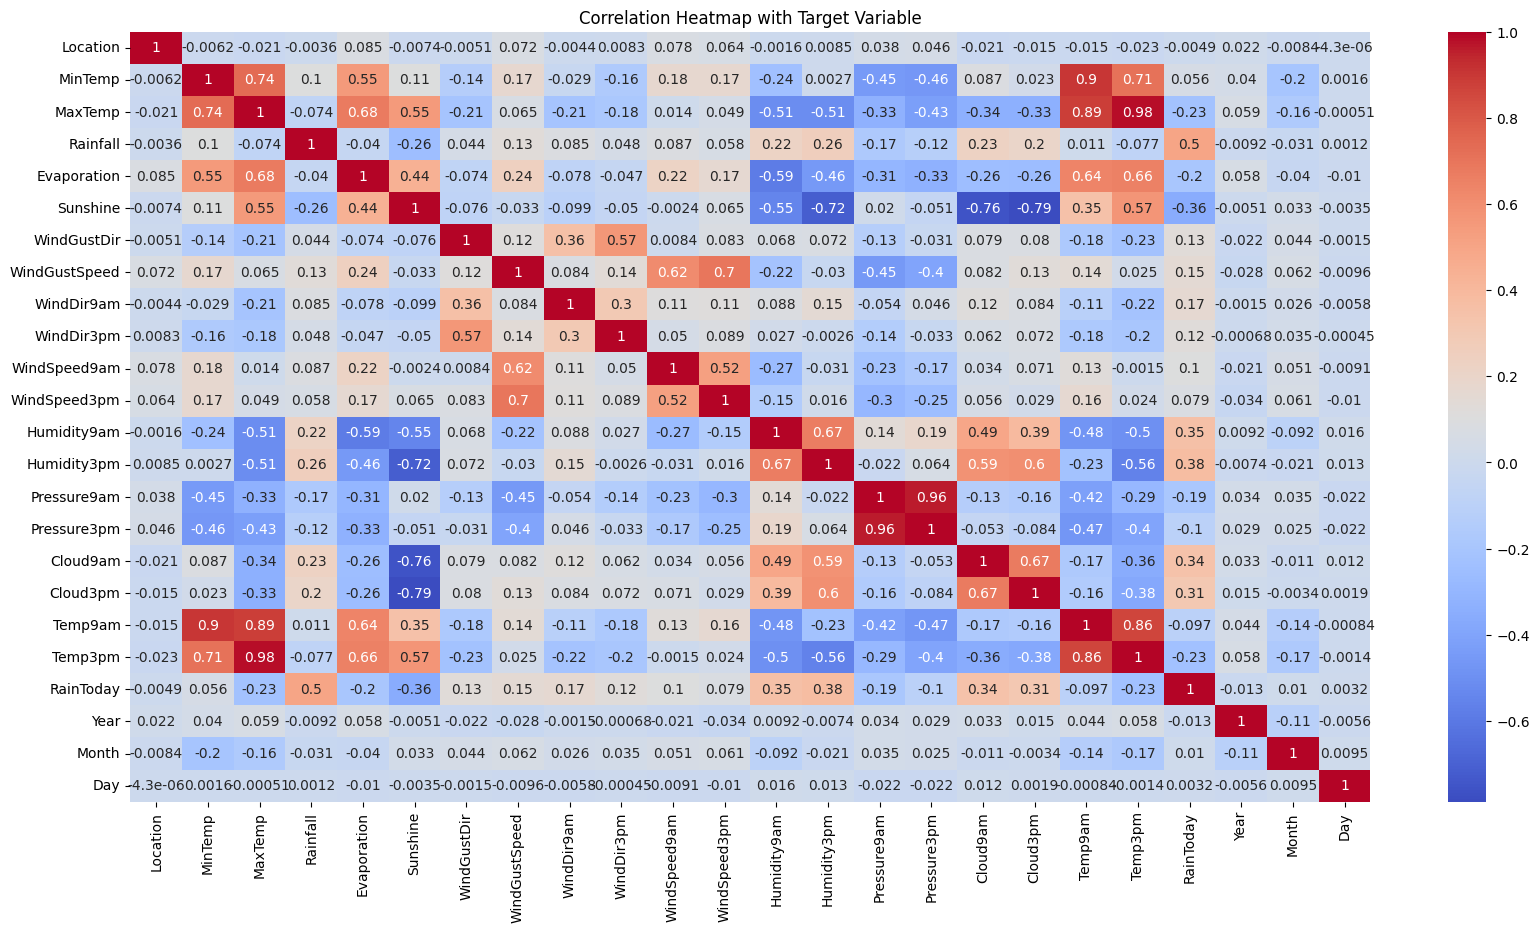

In [67]:
X = df_scaled.drop('RainTomorrow', axis=1)  # Replace 'TargetVariable' with the actual name of your target variable
y = df_scaled['RainTomorrow']

# Calculate the correlation matrix
correlation_matrix = X.corr()

# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap with Target Variable")
plt.show()


1. **MinTemp and MaxTemp**: These variables have a strong positive correlation with a coefficient of 0.74.

2. **MinTemp and Temp3pm**: There is a notable positive correlation of 0.71 between MinTemp and Temp3pm.

3. **MinTemp and Temp9am**: The correlation between MinTemp and Temp9am is exceptionally strong, with a coefficient of 0.90.

4. **MaxTemp and Temp9am**: MaxTemp and Temp9am also display a robust positive correlation, having a coefficient of 0.89.

5. **MaxTemp and Temp3pm**: MaxTemp and Temp3pm exhibit a remarkably strong positive correlation, with a coefficient of 0.98.

6. **WindGustSpeed and WindSpeed3pm**: These variables are highly positively correlated, with a coefficient of 0.69.

7. **Pressure9am and Pressure3pm**: Pressure9am and Pressure3pm show a very strong positive correlation, with a coefficient of 0.96.

8. **Temp9am and Temp3pm**: The correlation between Temp9am and Temp3pm is quite strong, with a coefficient of 0.86.

In summary, these pairs of variables demonstrate substantial positive relationships, as indicated by their correlation coefficients.

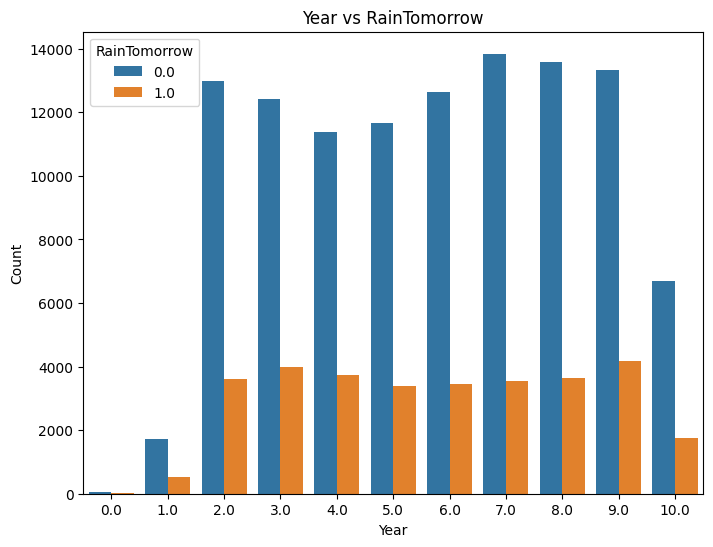

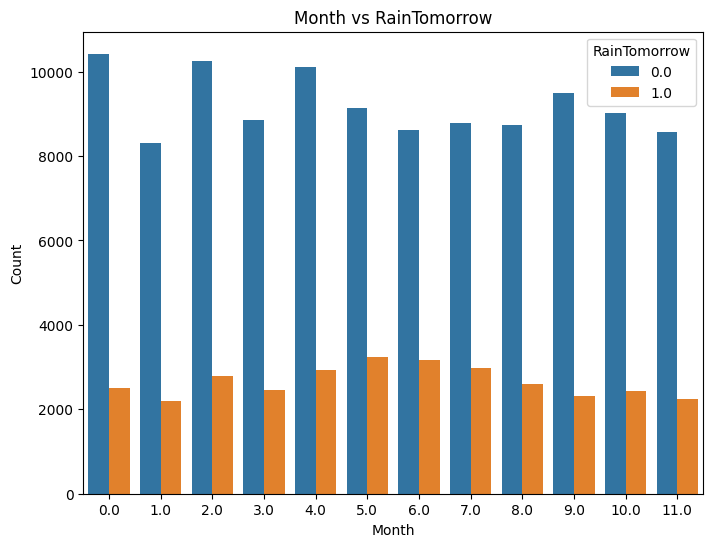

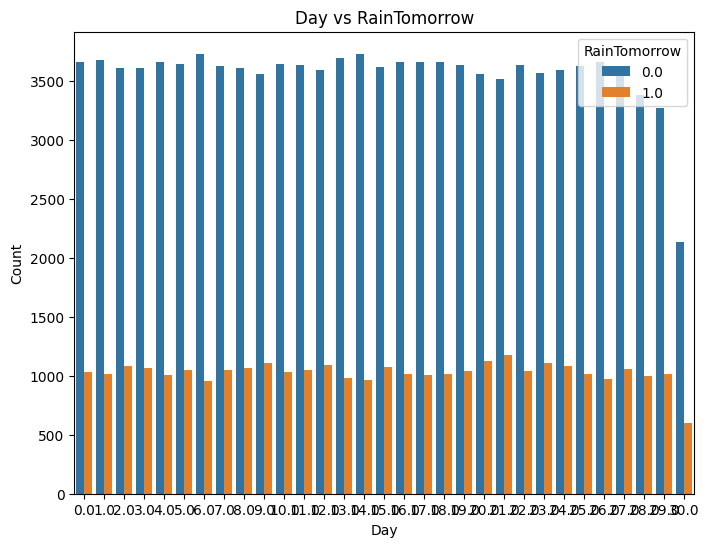

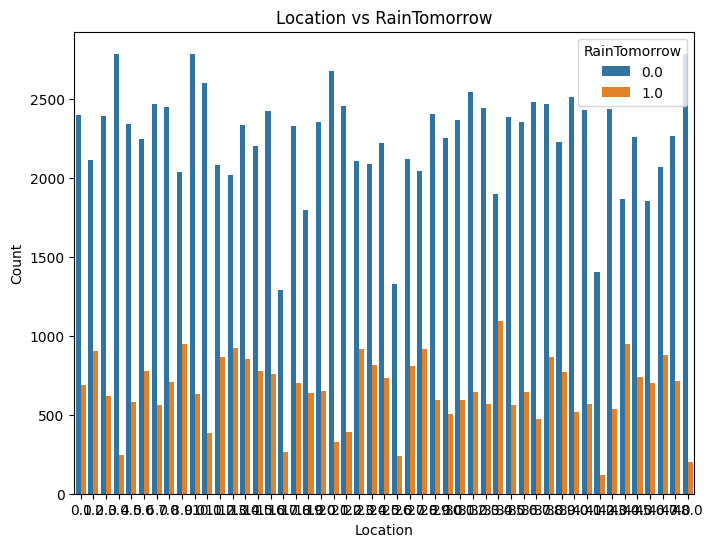

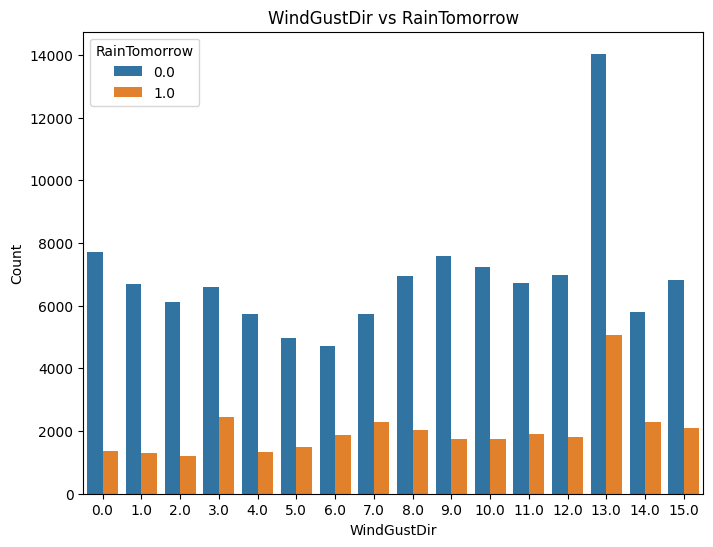

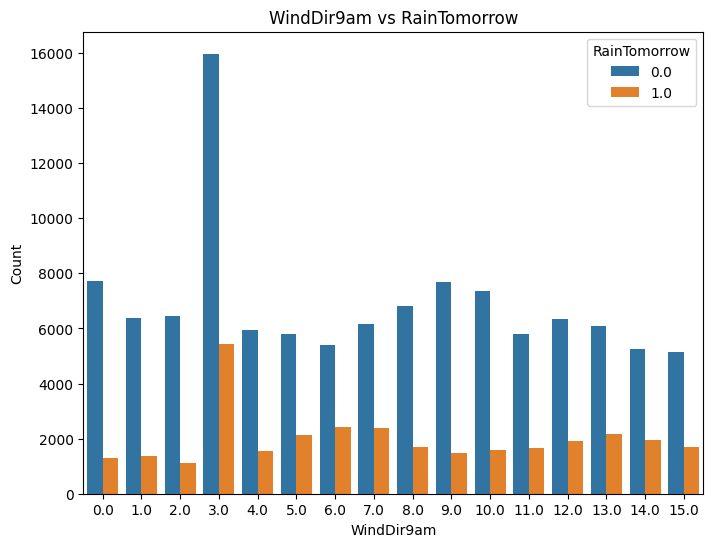

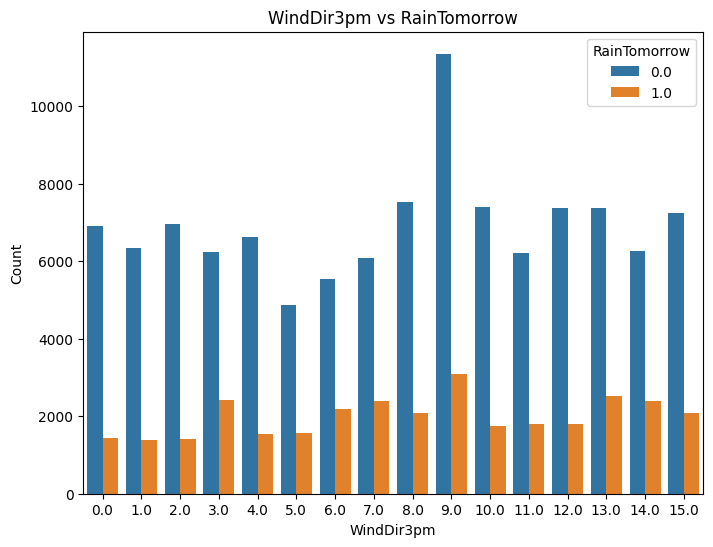

In [50]:
for column in cat_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, hue='RainTomorrow', data=normalized_data)
    plt.title(f'{column} vs RainTomorrow')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


## 3) Using FeatureCorrelation visualizer from Yellowbrick

In [ ]:
X = normalized_data.drop(['RainTomorrow'],axis=1)
y = normalized_data['RainTomorrow']

X.head()



Location  MinTemp  MaxTemp  Rainfall  Evaporation   Sunshine  WindGustDir  \
0       2.0     13.4     22.9       0.6     6.087168   7.523748         13.0   
1       2.0      7.4     25.1       0.0     5.974799  11.301878         14.0   
2       2.0     12.9     25.7       0.0     8.298065  12.191940         15.0   
3       2.0      9.2     28.0       0.0     6.400503  11.940729          4.0   
4       2.0     17.5     32.3       1.0     7.227323   6.379332         13.0   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure9am  Pressure3pm  \
0           44.0        13.0        14.0  ...       1007.7       1007.1   
1           44.0         6.0        15.0  ...       1010.6       1007.8   
2           46.0        13.0        15.0  ...       1007.6       1008.7   
3           24.0         9.0         0.0  ...       1017.6       1012.8   
4           41.0         1.0         7.0  ...       1010.8       1006.0   

   Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  Year  Month  Day  
0  8.000000  5.029771     16.9     21.8        0.0   1.0   11.0  0.0  
1  1.955876  2.616015     17.2     24.3        0.0   1.0   11.0  1.0  
2  2.048058  2.000000     21.0     23.2        0.0   1.0   11.0  2.0  
3  1.126834  1.851511     18.1     26.5        0.0   1.0   11.0  3.0  
4  7.000000  8.000000     17.8     29.7        0.0   1.0   11.0  4.0  

[5 rows x 24 columns]

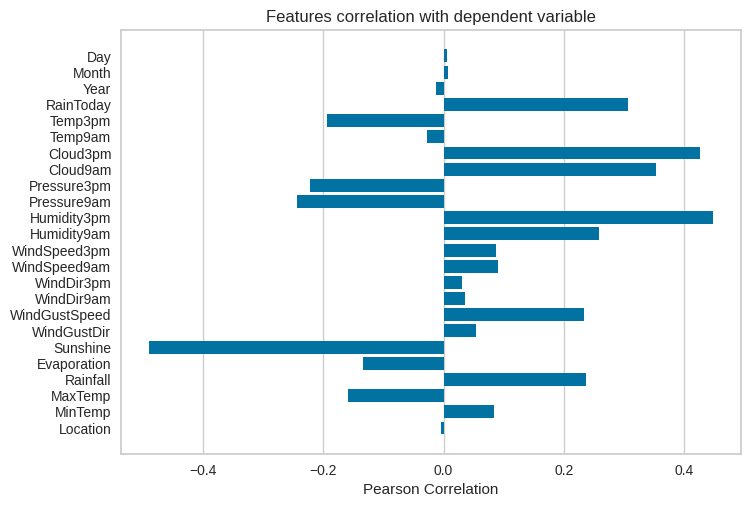

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [69]:
from yellowbrick.target import FeatureCorrelation
feature_names = list(X.columns)

visualizer = FeatureCorrelation(labels = feature_names)
visualizer.fit(X, y)
visualizer.poof()

Observation:


*   **RainToday**, **Cloud3pm**, **Cloud9am**, **Humidity3pm**, **Humidity9am**, **WindGustSpeed** and **Rainfall** are positively associated with the target.
*   Whereas, Sunshine, Pressure3pm and Pressure9am are negatively associated with the target.Hence, those are not useful feature for predicting target.







## Which predictor variables are the most important?

**RainToday**, **Cloud3pm**, **Cloud9am**, **Humidity3pm**, **Humidity9am**, **WindGustSpeed** and **Rainfall** are most important variable for predicting taget.

## Do the ranges of the predictor variables make sense?

<Axes: >

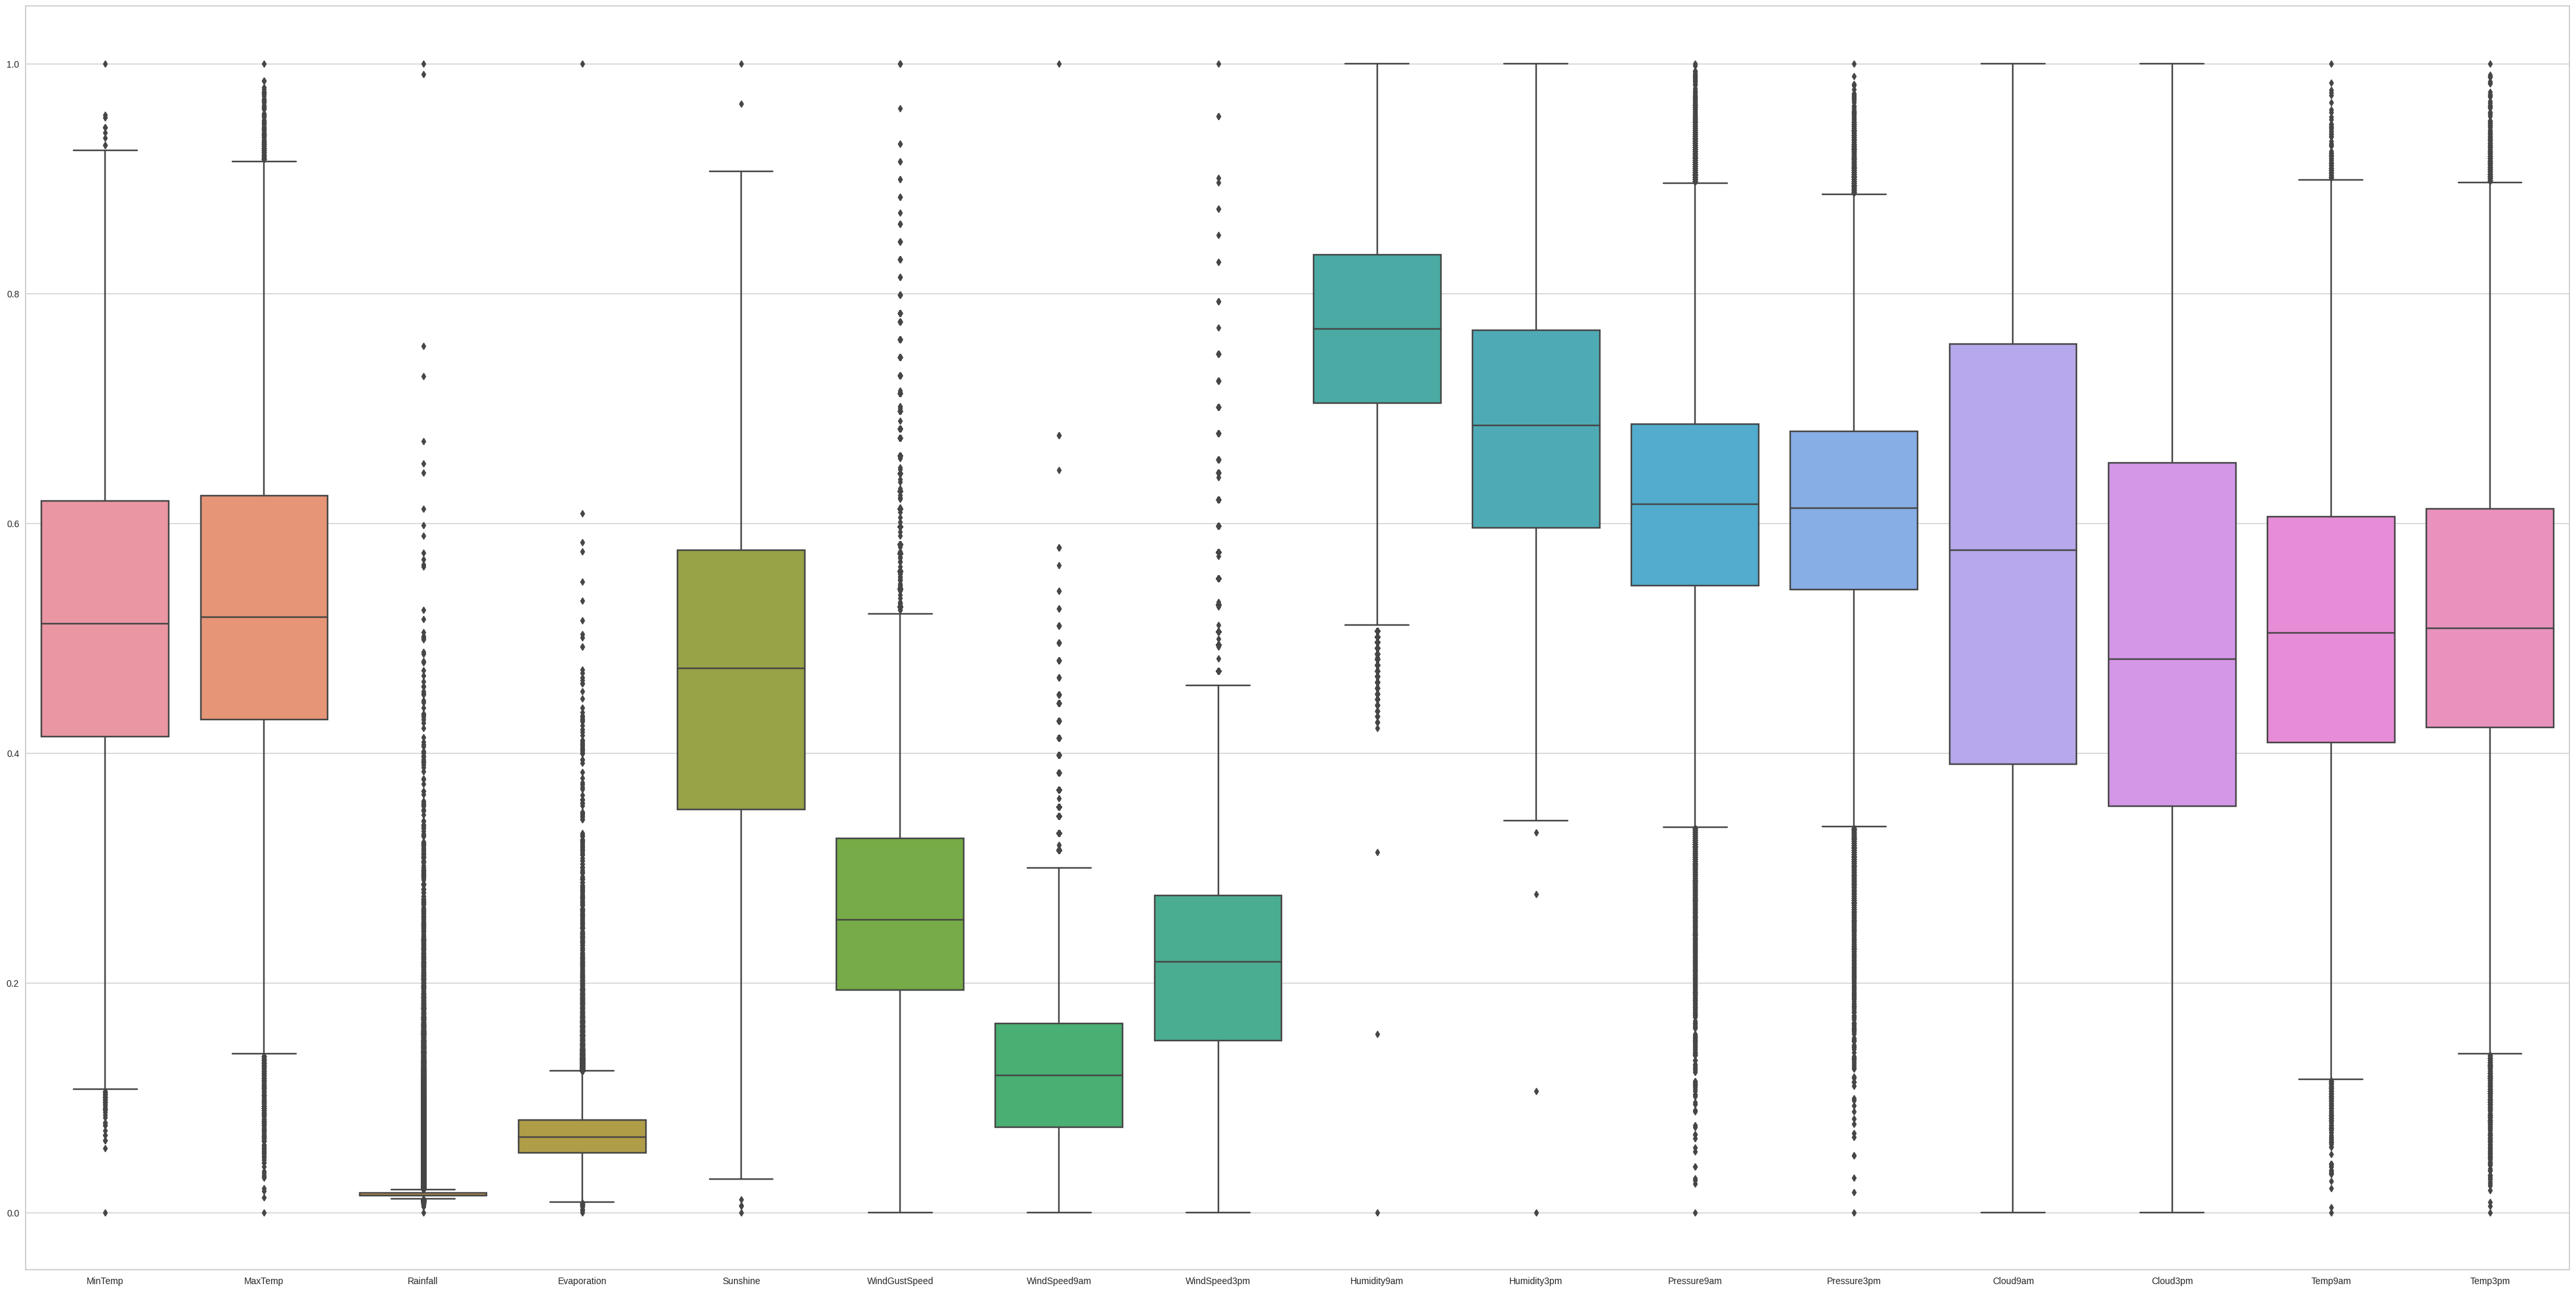

In [70]:
plt.figure(figsize=(50,25))
sns.boxplot(data=df_scaled[num_features])

Rainfall, Evaporation, WindGustSpeed, WindSpeed9am, Windspeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm have substantial outliers

# Do the training and test sets have the same data?

In [71]:
X = df_scaled.drop(['RainTomorrow'], axis=1)

y = df_scaled['RainTomorrow']

In [72]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [73]:
print(X_train.shape)

(113754, 24)


In [74]:
print(X_test.shape)

(28439, 24)


No, by looking at the shape of data training and test sets have different data. They are divided with 80:20 ratio

In [75]:
# Initializing Random Forest Classifier
RandForest_RFE = RandomForestClassifier()
# Initializing the RFE object, one of the most important arguments is the estimator, in this case is RandomForest
rfe = RFE(estimator=RandForest_RFE, n_features_to_select=10, step=1)
# Fit the origial dataset
rfe = rfe.fit(X_train, y_train)

In [76]:
print("Best features chosen by RFE: \n")

for i in X_train.columns[rfe.support_]:
    print(i)

Best features chosen by RFE: 

MinTemp
MaxTemp
Sunshine
WindGustSpeed
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp3pm


In [77]:
y_pred = rfe.predict(X_test)

In [78]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:" ,cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                  index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# print classification accuracy
classification_accuracy = (cm[0,0] + cm[1,1]) / float(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print classification error
classification_error = (cm[0,1] + cm[1,0]) / float(cm[0,0] + cm[1,1] + cm[0,1] + cm[1,0])
print('Classification error : {0:0.4f}'.format(classification_error))

Confusion Matrix: [[21156   911]
 [ 2439  3933]]
True Positives(TP) =  21156
True Negatives(TN) =  3933
False Positives(FP) =  911
False Negatives(FN) =  2439
Classification accuracy : 0.8822
Classification error : 0.1178


logistic regression on most important features

In [79]:
from sklearn.linear_model import LogisticRegression
# Initialize the logistic regression model
logistic_reg_model = LogisticRegression()

# Train the model on the training data
logistic_reg_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
y_pred = logistic_reg_model.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)


Accuracy: 0.86
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     22067
         1.0       0.74      0.56      0.64      6372

    accuracy                           0.86     28439
   macro avg       0.81      0.75      0.77     28439
weighted avg       0.85      0.86      0.85     28439

Confusion Matrix:
 [[20826  1241]
 [ 2813  3559]]


We can anticipate that the RandomForestClassification model is likely to achieve a higher accuracy score, approximately 88%, compared to the Logistic Regression model, which is expected to yield an accuracy of around 86%.

# Remove outliers and keep outliers (does if have an effect of the final predictive model)?

In [91]:
df_Oclean = df_scaled.copy()

In [92]:
def remove_out(df_Oclean, num_cols, lbv=0.25, hbv=0.75):
    Q1 = df_Oclean[num_cols].quantile(lbv)
    Q3 = df_Oclean[num_cols].quantile(hbv)
    IQR = Q3-Q1
    lb = Q1-1.5*IQR
    hb = Q3+1.5*IQR
    for i in num_cols:
        df_Oclean = df_Oclean[(df_Oclean[i]>=lb[i]) & (df_Oclean[i]<=hb[i])]
    return df_Oclean

In [93]:
cols_outliers = ['MinTemp', 'MaxTemp', 'Rainfall',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day', 'Evaporation', 'Sunshine','RainToday', 'RainTomorrow']

In [94]:
df_clean = remove_out(df_Oclean, cols_outliers, lbv=0.10, hbv=0.90)
df_clean.shape

(135751, 25)

In [95]:
X_new = df_clean.drop(['RainTomorrow'], axis=1)

y_new = df_clean['RainTomorrow']

In [96]:
X_new.shape

(135751, 24)

In [97]:
# split X_new and y_new into training and testing sets

from sklearn.model_selection import train_test_split

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size = 0.2, random_state = 0)

In [98]:
print(X_train_new.shape)

(108600, 24)


In [99]:
print(X_test_new.shape)

(27151, 24)


In [100]:
# Initializing Random Forest Classifier
RandForest_RFE = RandomForestClassifier()
# Initializing the RFE object, one of the most important arguments is the estimator, in this case is RandomForest
rfe = RFE(estimator=RandForest_RFE, n_features_to_select=10, step=1)
# Fit the origial dataset
rfe = rfe.fit(X_train_new, y_train_new)

In [101]:
y_pred_new = rfe.predict(X_test_new)

Confusion Matrix: [[20833   816]
 [ 2292  3210]]
True Positives(TP) =  20833
True Negatives(TN) =  3210
False Positives(FP) =  816
False Negatives(FN) =  2292
Classification accuracy : 0.8855
Classification error : 0.1145


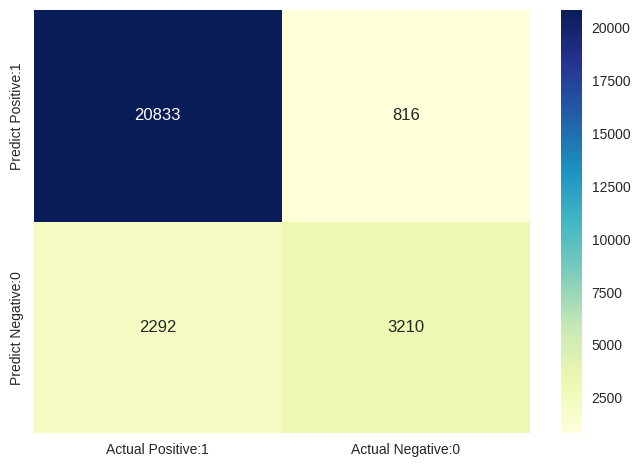

In [102]:
# Create the confusion matrix
cm1 = confusion_matrix(y_test_new, y_pred_new)

# Print the confusion matrix
print("Confusion Matrix:" ,cm1)
print('True Positives(TP) = ', cm1[0,0])
print('True Negatives(TN) = ', cm1[1,1])
print('False Positives(FP) = ', cm1[0,1])
print('False Negatives(FN) = ', cm1[1,0])

# visualize confusion matrix with seaborn heatmap
cm_matrix1 = pd.DataFrame(data=cm1, columns=['Actual Positive:1', 'Actual Negative:0'],
                                  index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix1, annot=True, fmt='d', cmap='YlGnBu')

# print classification accuracy
classification_accuracy1 = (cm1[0,0] + cm1[1,1]) / float(cm1[0,0] + cm1[1,1] + cm1[0,1] + cm1[1,0])
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy1))

# print classification error
classification_error1 = (cm1[0,1] + cm1[1,0]) / float(cm1[0,0] + cm1[1,1] + cm1[0,1] + cm1[1,0])
print('Classification error : {0:0.4f}'.format(classification_error1))

In [103]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy2 = accuracy_score(y_test_new, y_pred_new)
print(f'Accuracy: {accuracy2:.2f}')

# Generate a classification report
report2 = classification_report(y_test_new, y_pred_new)
print('Classification Report:\n', report2)

# Create a confusion matrix
cm2 = confusion_matrix(y_test_new, y_pred_new)
print('Confusion Matrix:\n', cm2)

Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.96      0.93     21649
         1.0       0.80      0.58      0.67      5502

    accuracy                           0.89     27151
   macro avg       0.85      0.77      0.80     27151
weighted avg       0.88      0.89      0.88     27151

Confusion Matrix:
 [[20833   816]
 [ 2292  3210]]


Upon removing outliers, we observed a notable improvement in the accuracy score, reaching 89%. This enhancement underscores the significant impact of outliers on the final predictive model's performance.

# Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

In [104]:
# remove 1%
n=round(0.99*len(df_scaled))
red_data1 = df_scaled.sample(n=n)

# remove 5%
n=round(0.95*len(df_scaled))
red_data5 = df_scaled.sample(n=n)

# remove 10%
n=round(0.90*len(df_scaled))
red_data10 = df_scaled.sample(n=n)

##Data imputation using mode

Data imputation using the mode involves replacing missing values in a dataset with the most frequently occurring value (mode) in the respective column. This imputation method is commonly used for categorical variables and discrete data. It helps maintain the distribution of the variable while filling in missing entries with the most common category.

In [119]:
imputed_data1 = red_data1.copy(deep=True)
for col in imputed_data1.columns:
  imputed_data1[col] = imputimputed_data1ed_data_1[col].fillna(imputed_data1[col].mode()[0])

imputed_data5 = red_data5.copy(deep=True)
for col in imputed_data5.columns:
  imputed_data5[col] = imputed_data5[col].fillna(imputed_data5[col].mode()[0])


imputed_data10 = red_data10.copy(deep=True)
for col in imputed_data10.columns:
  imputed_data10[col] = imputed_data10[col].fillna(imputed_data10[col].mode()[0])

In [120]:
X = imputed_data1.drop(['RainTomorrow'], axis=1)

y = imputed_data1['RainTomorrow']

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Initializing Random Forest Classifier
RandForest_RFE = RandomForestClassifier()
# Initializing the RFE object, one of the most important arguments is the estimator, in this case is RandomForest
rfe = RFE(estimator=RandForest_RFE, n_features_to_select=10, step=1)
# Fit the origial dataset
rfe = rfe.fit(X_train_red, y_train_red)

y_pred_red = rfe.predict(X_test_red)

# Calculate accuracy
accuracy = accuracy_score(y_test_red, y_pred_red)
print(f'Accuracy: {accuracy:}')

# Generate a classification report
report = classification_report(y_test_red, y_pred_red)
print('Classification Report:\n', report)

# Create a confusion matrix
cm = confusion_matrix(y_test_red, y_pred_red)
print('Confusion Matrix:\n', cm)

Accuracy: 0.8806251109927189
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.96      0.93     21930
         1.0       0.80      0.61      0.69      6225

    accuracy                           0.88     28155
   macro avg       0.85      0.78      0.81     28155
weighted avg       0.88      0.88      0.87     28155

Confusion Matrix:
 [[20977   953]
 [ 2408  3817]]


In [121]:
X = imputed_data5.drop(['RainTomorrow'], axis=1)

y = imputed_data5['RainTomorrow']

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Initializing Random Forest Classifier
RandForest_RFE = RandomForestClassifier()
# Initializing the RFE object, one of the most important arguments is the estimator, in this case is RandomForest
rfe = RFE(estimator=RandForest_RFE, n_features_to_select=10, step=1)
# Fit the origial dataset
rfe = rfe.fit(X_train_red, y_train_red)

y_pred_red = rfe.predict(X_test_red)

# Calculate accuracy
accuracy = accuracy_score(y_test_red, y_pred_red)
print(f'Accuracy: {accuracy:}')

# Generate a classification report
report = classification_report(y_test_red, y_pred_red)
print('Classification Report:\n', report)

# Create a confusion matrix
cm = confusion_matrix(y_test_red, y_pred_red)
print('Confusion Matrix:\n', cm)

Accuracy: 0.879705370692527
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.96      0.93     20951
         1.0       0.81      0.61      0.69      6066

    accuracy                           0.88     27017
   macro avg       0.85      0.78      0.81     27017
weighted avg       0.87      0.88      0.87     27017

Confusion Matrix:
 [[20078   873]
 [ 2377  3689]]


In [110]:
X = imputed_data10.drop(['RainTomorrow'], axis=1)

y = imputed_data10['RainTomorrow']

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Initializing Random Forest Classifier
RandForest_RFE = RandomForestClassifier()
# Initializing the RFE object, one of the most important arguments is the estimator, in this case is RandomForest
rfe = RFE(estimator=RandForest_RFE, n_features_to_select=10, step=1)
# Fit the origial dataset
rfe = rfe.fit(X_train_red, y_train_red)

y_pred_red = rfe.predict(X_test_red)

# Calculate accuracy
accuracy = accuracy_score(y_test_red, y_pred_red)
print(f'Accuracy: {accuracy:}')

# Generate a classification report
report = classification_report(y_test_red, y_pred_red)
print('Classification Report:\n', report)

# Create a confusion matrix
cm = confusion_matrix(y_test_red, y_pred_red)
print('Confusion Matrix:\n', cm)

Accuracy: 0.8802891189685486
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.96      0.93     19751
         1.0       0.82      0.61      0.70      5844

    accuracy                           0.88     25595
   macro avg       0.86      0.79      0.81     25595
weighted avg       0.88      0.88      0.87     25595

Confusion Matrix:
 [[18959   792]
 [ 2272  3572]]


## Data imputation using median

Data imputation using the median involves replacing missing values in a dataset with the median value of the respective column. This imputation method is commonly used for continuous numerical variables and is robust to outliers. It helps maintain the central tendency of the data while filling in missing entries with a representative value.

In [111]:
imputed_data1 = red_data1.copy(deep=True)
for col in imputed_data1.columns:
  imputed_data1[col] = imputed_data1[col].fillna(imputed_data1[col].median())

imputed_data5 = red_data5.copy(deep=True)
for col in imputed_data5.columns:
  imputed_data5[col] = imputed_data_5[col].fillna(imputed_data5[col].median())


imputed_data10 = red_data10.copy(deep=True)
for col in imputed_data10.columns:
  imputed_data10[col] = imputed_data10[col].fillna(imputed_data10[col].median())

In [112]:
X = imputed_data1.drop(['RainTomorrow'], axis=1)

y = imputed_data1['RainTomorrow']

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Initializing Random Forest Classifier
RandForest_RFE = RandomForestClassifier()
# Initializing the RFE object, one of the most important arguments is the estimator, in this case is RandomForest
rfe = RFE(estimator=RandForest_RFE, n_features_to_select=10, step=1)
# Fit the origial dataset
rfe = rfe.fit(X_train_red, y_train_red)

y_pred_red = rfe.predict(X_test_red)

# Calculate accuracy
accuracy = accuracy_score(y_test_red, y_pred_red)
print(f'Accuracy: {accuracy:}')

# Generate a classification report
report = classification_report(y_test_red, y_pred_red)
print('Classification Report:\n', report)

# Create a confusion matrix
cm = confusion_matrix(y_test_red, y_pred_red)
print('Confusion Matrix:\n', cm)

Accuracy: 0.88151305274374
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.96      0.93     21930
         1.0       0.80      0.62      0.70      6225

    accuracy                           0.88     28155
   macro avg       0.85      0.79      0.81     28155
weighted avg       0.88      0.88      0.88     28155

Confusion Matrix:
 [[20981   949]
 [ 2387  3838]]


In [113]:
X = imputed_data5.drop(['RainTomorrow'], axis=1)

y = imputed_data5['RainTomorrow']

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Initializing Random Forest Classifier
RandForest_RFE = RandomForestClassifier()
# Initializing the RFE object, one of the most important arguments is the estimator, in this case is RandomForest
rfe = RFE(estimator=RandForest_RFE, n_features_to_select=10, step=1)
# Fit the origial dataset
rfe = rfe.fit(X_train_red, y_train_red)

y_pred_red = rfe.predict(X_test_red)

# Calculate accuracy
accuracy = accuracy_score(y_test_red, y_pred_red)
print(f'Accuracy: {accuracy:}')

# Generate a classification report
report = classification_report(y_test_red, y_pred_red)
print('Classification Report:\n', report)

# Create a confusion matrix
cm = confusion_matrix(y_test_red, y_pred_red)
print('Confusion Matrix:\n', cm)

Accuracy: 0.8789650960506348
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.96      0.92     20951
         1.0       0.81      0.60      0.69      6066

    accuracy                           0.88     27017
   macro avg       0.85      0.78      0.81     27017
weighted avg       0.87      0.88      0.87     27017

Confusion Matrix:
 [[20088   863]
 [ 2407  3659]]


In [114]:
X = imputed_data10.drop(['RainTomorrow'], axis=1)

y = imputed_data10['RainTomorrow']

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Initializing Random Forest Classifier
RandForest_RFE = RandomForestClassifier()
# Initializing the RFE object, one of the most important arguments is the estimator, in this case is RandomForest
rfe = RFE(estimator=RandForest_RFE, n_features_to_select=10, step=1)
# Fit the origial dataset
rfe = rfe.fit(X_train_red, y_train_red)

y_pred_red = rfe.predict(X_test_red)

# Calculate accuracy
accuracy = accuracy_score(y_test_red, y_pred_red)
print(f'Accuracy: {accuracy:}')

# Generate a classification report
report = classification_report(y_test_red, y_pred_red)
print('Classification Report:\n', report)

# Create a confusion matrix
cm = confusion_matrix(y_test_red, y_pred_red)
print('Confusion Matrix:\n', cm)

Accuracy: 0.8797030670052745
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.96      0.92     19751
         1.0       0.82      0.61      0.70      5844

    accuracy                           0.88     25595
   macro avg       0.85      0.79      0.81     25595
weighted avg       0.88      0.88      0.87     25595

Confusion Matrix:
 [[18943   808]
 [ 2271  3573]]


## Data imputation using MICE

Data imputation using the Multiple Imputation by Chained Equations (MICE) iterative method is a technique for handling missing data by imputing values through a series of predictive models. It's particularly useful when dealing with datasets where missing values are not completely at random and when you want to preserve the relationships between variables.

In [115]:
imputed_data1 = red_data1.copy(deep=True)
mice_imputer = IterativeImputer()
imputed_data1.iloc[:, :] = mice_imputer.fit_transform(reduced_data1)

imputed_data5 = red_data5.copy(deep=True)
imputed_data5.iloc[:, :] = mice_imputer.fit_transform(reduced_data5)

imputed_data10 = red_data10.copy(deep=True)
imputed_data10.iloc[:, :] = mice_imputer.fit_transform(reduced_data10)

In [116]:
X = imputed_data1.drop(['RainTomorrow'], axis=1)

y = imputed_data1['RainTomorrow']

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Initializing Random Forest Classifier
RandForest_RFE = RandomForestClassifier()
# Initializing the RFE object, one of the most important arguments is the estimator, in this case is RandomForest
rfe = RFE(estimator=RandForest_RFE, n_features_to_select=10, step=1)
# Fit the origial dataset
rfe = rfe.fit(X_train_red, y_train_red)

y_pred_red = rfe.predict(X_test_red)

# Calculate accuracy
accuracy = accuracy_score(y_test_red, y_pred_red)
print(f'Accuracy: {accuracy:}')

# Generate a classification report
report = classification_report(y_test_red, y_pred_red)
print('Classification Report:\n', report)

# Create a confusion matrix
cm = confusion_matrix(y_test_red, y_pred_red)
print('Confusion Matrix:\n', cm)

Accuracy: 0.8814420174036584
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.96      0.93     21930
         1.0       0.80      0.62      0.70      6225

    accuracy                           0.88     28155
   macro avg       0.85      0.79      0.81     28155
weighted avg       0.88      0.88      0.88     28155

Confusion Matrix:
 [[20981   949]
 [ 2389  3836]]


In [117]:
X = imputed_data5.drop(['RainTomorrow'], axis=1)

y = imputed_data5['RainTomorrow']

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Initializing Random Forest Classifier
RandForest_RFE = RandomForestClassifier()
# Initializing the RFE object, one of the most important arguments is the estimator, in this case is RandomForest
rfe = RFE(estimator=RandForest_RFE, n_features_to_select=10, step=1)
# Fit the origial dataset
rfe = rfe.fit(X_train_red, y_train_red)

y_pred_red = rfe.predict(X_test_red)

# Calculate accuracy
accuracy = accuracy_score(y_test_red, y_pred_red)
print(f'Accuracy: {accuracy:}')

# Generate a classification report
report = classification_report(y_test_red, y_pred_red)
print('Classification Report:\n', report)

# Create a confusion matrix
cm = confusion_matrix(y_test_red, y_pred_red)
print('Confusion Matrix:\n', cm)

Accuracy: 0.8794832882999593
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.96      0.92     20951
         1.0       0.81      0.61      0.69      6066

    accuracy                           0.88     27017
   macro avg       0.85      0.78      0.81     27017
weighted avg       0.87      0.88      0.87     27017

Confusion Matrix:
 [[20070   881]
 [ 2375  3691]]


In [123]:
X = imputed_data10.drop(['RainTomorrow'], axis=1)

y = imputed_data10['RainTomorrow']

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Initializing Random Forest Classifier
RandForest_RFE = RandomForestClassifier()
# Initializing the RFE object, one of the most important arguments is the estimator, in this case is RandomForest
rfe = RFE(estimator=RandForest_RFE, n_features_to_select=10, step=1)
# Fit the origial dataset
rfe = rfe.fit(X_train_red, y_train_red)

y_pred_red = rfe.predict(X_test_red)

# Calculate accuracy
accuracy = accuracy_score(y_test_red, y_pred_red)
print(f'Accuracy: {accuracy:}')

# Generate a classification report
report = classification_report(y_test_red, y_pred_red)
print('Classification Report:\n', report)

# Create a confusion matrix
cm = confusion_matrix(y_test_red, y_pred_red)
print('Confusion Matrix:\n', cm)

Accuracy: 0.8785309630787264
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.96      0.92     19751
         1.0       0.81      0.61      0.70      5844

    accuracy                           0.88     25595
   macro avg       0.85      0.78      0.81     25595
weighted avg       0.87      0.88      0.87     25595

Confusion Matrix:
 [[18941   810]
 [ 2299  3545]]


# Questions

* Which independent variables are useful to predict a target (dependent variable)?
As observed earlier, all variables demonstrate a significant influence on the target variable. However, for predictive modeling, the following variables have been identified as particularly valuable:
1) MinTemp
2) MaxTemp
3) Sunshine
4) WindGustSpeed
5) Humidity3pm
6) Pressure9am
7) Pressure3pm
8) Cloud9am
9) Cloud3pm
10) Temp3pm

* Which independent variable have missing data? How much?
>Among the variables, Pressure9am, Pressure3pm, and sunshine exhibit a relatively higher rate of missing data, ranging from 30% to 50%. In contrast, the remaining variables demonstrate a lower prevalence of missing values.

* Do the training and test sets have the same data?
>The training and test sets are characterized by distinct data ranges, and they have been partitioned in an 80:20 ratio.

* In the predictor variables independent of all the other predictor variables?
>No, instead we have observed robust correlations among predictor variables themselves.

* Which predictor variables are the most important?
>RainToday, Cloud3pm, Cloud9am, Humidity3pm, Humidity9am, WindGustSpeed and Rainfall are most important variable for predicting taget.

* Do the ranges of the predictor variables make sense?
> yes, looking at boxplot we can infer that ranges of predictor variables makes sense

* What are the distributions of the predictor variables?
>*   Bimodal Distributions: Sunshine, Cloud9am, Cloud3pm
 *   Exponential Distributions: Rainfall, Evaporation, WindSpeed9am, WindSpeed3pm
 *   Skewed Normal Distributions: MinTemp, MaxTemp, WindGustSpeed, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm


# References

[Machine Learning A-Z™: AI, Python & R + ChatGPT Bonus [2023]- Udemy](https://www.udemy.com/course/machinelearning/)

[Data Cleaning and EDA- Youtube](https://www.youtube.com/watch?v=VCt7UaIr64I)

https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Abalone.ipynb

https://machinelearningmastery.com/calculate-feature-importance-with-python/



#Copyright

Copyright (c) 2023 Asawari Anant Kadam

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.